<a href="https://colab.research.google.com/github/soyeonpark11/2020_cphys2/blob/master/hw9-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
from tensorflow import keras
from keras import models 
from keras import layers
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import tensorflow as tf

학습셋 : 60000 테스트셋:  10000


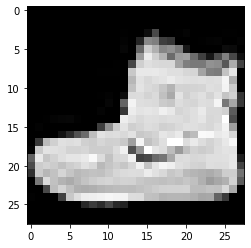

9
(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


In [23]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()
print("학습셋 :",len(train_X),"테스트셋: ", len(test_X))
plt.imshow(train_X[0], CMAP='gray')
plt.show()
print(train_Y[0])
train_X = train_X/255.0
test_X = test_X/255.0
print(train_X.shape, test_X.shape)
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)
print(train_X.shape, test_X.shape)



In [30]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=16, activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=32,activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(units=10, activation='softmax')
                                                                                 
])



In [35]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Epoch 1/20
1407/1407 [==============================] - 27s 19ms/step - loss: 0.0685 - accuracy: 0.9730 - val_loss: 0.5021 - val_accuracy: 0.9085
Epoch 2/20
1407/1407 [==============================] - 27s 19ms/step - loss: 0.0672 - accuracy: 0.9744 - val_loss: 0.4807 - val_accuracy: 0.9100
Epoch 3/20
1407/1407 [==============================] - 27s 19ms/step - loss: 0.0694 - accuracy: 0.9745 - val_loss: 0.4655 - val_accuracy: 0.9095
Epoch 4/20
1407/1407 [==============================] - 26s 19ms/step - loss: 0.0631 - accuracy: 0.9754 - val_loss: 0.4931 - val_accuracy: 0.9080
Epoch 5/20
1407/1407 [==============================] - 27s 19ms/step - loss: 0.0690 - accuracy: 0.9737 - val_loss: 0.5033 - val_accuracy: 0.9103
Epoch 6/20
1407/1407 [==============================] - 26s 19ms/step - loss: 0.0669 - accuracy: 0.9738 - val_loss: 0.4906 - val_accuracy: 0.9082
Epoch 7/20
1407/1407 [==============================] - 27s 19ms/step - loss: 0.0628 - accuracy: 0.9762 - val_loss: 0.5113 -

[0.6258544921875, 0.9021000266075134]

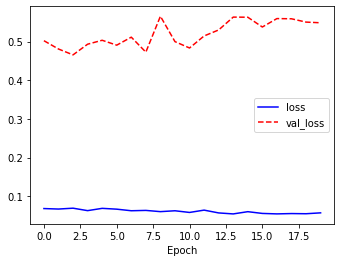

In [39]:
history = model.fit(train_X, train_Y, epochs=20, validation_split=0.25)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
model.evaluate(test_X, test_Y, verbose=0)
